# NLP: Analyzing readibility of famous US speeches and US Presidential Inaugural speeches

In the first part of this notebook, the readibility of famous U.S. speeches from the 20th and 21st centuries is analyzed. The Flesch score, grade, and ease are calculated. The higher the score, the easier the text to be read. In the second part of this notebook, the readibility of inaugural speeches of US presidents is also calculated. 

**Overall, the language of speeches have reduced the level of complexity throughout time.** On average, the language of speeches used to very confusing or difficult in the past; they seemed to be addressed to an audience with college-level education. Now-a-days, the language of speeches tends to be easier to understand.

*Sources*:
- Source of Presidential Inaugural speeches corpus: NLTK database
- Source of famous speeches: [Americanrhetoric.com](https://www.americanrhetoric.com/index.htm)

## 1) Famous speeches in the 20th and 21st Centuries

In [ ]:
# define functions to process the data
import os
import nltk
nltk.download('punkt')
from readability import Readability

def wordcleaner(words):
  """
  Function takes a list of words.
  Returns a string with words without "a0" at the beginning.
  """
  cleanWords = ""
  for word in words:
    if word[0] == "'" and word[1] == "a" and word[2] == "0":
      newWord = word[3:]
      cleanWords += str(newWord+ " ").replace("\n","")
      #cleanWords.append(newWord.strip())
    else:
      cleanWords += str(word + " ").replace("\n","")
  return cleanWords

def processfiles(directory):
  """
  Function takes a directory with txt files.
  Returns a dictionary: {year: {author: string, title: string, date:string, text: string}...}
  """
  # Initialize dictionary
  speeches = {}
  fnum = 0
  for filename in os.listdir(directory):
    fnum += 1
    lines = open(directory + filename,  encoding='utf-8').readlines()
  
    # Extract the information
    author = lines[0].strip().replace("\\","")
    title = lines[1].strip().replace("\\","")
    date = lines[2].strip().replace("\\","")
    year = int(date.split()[2])
    text = lines[3:]
    
    # process text
    newText = ""
    for i in range(len(text)):
      words = wordcleaner(text[i].split('\\'))
      newText += words
 
    # create dictionary where key is year
    speeches.setdefault(year, {})
    speeches[year].setdefault('author', author)
    speeches[year].setdefault('title', title)
    speeches[year].setdefault('date', date)
    speeches[year].setdefault('text', newText)
    speeches[year].setdefault('length', 0)
    speeches[year].setdefault('score', 0)
    speeches[year].setdefault('ease', 0)
    speeches[year].setdefault('grades', 0)
    #speeches[year].setdefault('dale_chall_score', 0)

  return speeches


# define functions to calculate readibility
#!pip install py-readability-metrics
def get_flesch(text):
  """
  Function takes a text and measures Flesch Kincaid readibility score.
  Returns a tuple with score, grade level. 
  """
  r = Readability(text)
  f = r.flesch()
  return f.score, f.ease, f.grade_levels

def get_dale_chall(text):
  """
  Function takes a text and measures Dale Chall readibility score:
  based on the use of familiar words
  Returns a tuple with score, grade level. 
  """
  r = Readability(text)
  dc = r.dale_chall()
  return dc.score, dc.grade_levels

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Call the function
speeches = processfiles("./data/")

# For each item in dictionary, calculate the scores 
for year, secondDict in speeches.items():
  secondDict['score'] = get_flesch(secondDict['text'])[0]
  secondDict['ease'] = get_flesch(secondDict['text'])[1]
  secondDict['grades'] = get_flesch(secondDict['text'])[2]
  secondDict['length'] = len(secondDict['text'])
  #secondDict['dale_chall_score'] = get_dale_chall(secondDict['text'])

# Create a Dataframe
import pandas as pd
df = pd.DataFrame.from_dict(speeches,orient='index').reset_index()
df = df.rename(columns={'index':'year'})
df.head()

,year,author,title,date,text,length,score,ease,grades
0,1917,Woodrow Wilson,War Message,02 April 1917,Gentlemen of the Congress: I have called the ...,21296,40.885970,difficult,[college]
1,1941,Franklin D. Roosevelt,Pearl Harbor Address to the Nation,08 December 1941,"Mr. Vice President, Mr. Speaker, Members of th...",3148,43.381031,difficult,[college]
2,1952,Richard Nixon,Checkers,23 September 1952,"My Fellow Americans, I come before you tonigh...",25337,69.721365,standard,"[8, 9]"
3,1933,Franklin D. Roosevelt,First Inaugural Address,04 March 1933,"President Hoover, Mr. Chief Justice, my friend...",11422,52.846775,fairly_difficult,"[10, 11, 12]"
4,1961,Dwight Eisenhower,Farewell Address,17 January 1961,"Good evening, my fellow Americans. First, I sh...",11724,45.516098,difficult,[college]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


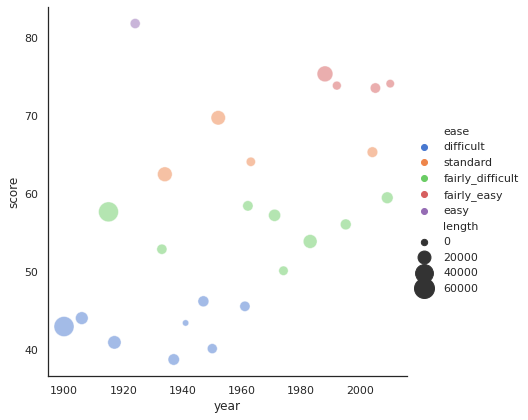

In [ ]:
# Plot the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
sns.relplot(x="year", y="score", size="length", hue="ease",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.show()

## 2) Inaugural speeches from US presidents: from Washington to Trump

In [ ]:
import nltk
from nltk.corpus import inaugural
nltk.download('inaugural')
#inaugural.fileids()

# we can also check state of the union addresses
#from nltk.corpus import state_union
#nltk.download('state_union')
#state_union.fileids()

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [ ]:
# read all inaugural files and measure flesch score, grade, and ease
inaugural_speeches = {}
for fname in inaugural.fileids():
  president_name = fname.replace(".txt","")[5:]
  year = fname[:4]
  inaugural_speeches.setdefault(year, {})
  inaugural_speeches[year].setdefault('president',0)
  inaugural_speeches[year].setdefault('score',0)
  inaugural_speeches[year].setdefault('ease',0)
  inaugural_speeches[year].setdefault('grade',0)
  inaugural_speeches[year].setdefault('length',0)
  #inaugural_speeches[year].setdefault('dale_chall',0)
  text = inaugural.open(fname).read()
  inaugural_speeches[year]['president']= president_name
  inaugural_speeches[year]['score'] =  get_flesch(text)[0]
  inaugural_speeches[year]['ease'] = get_flesch(text)[1]
  inaugural_speeches[year]['grade'] =  get_flesch(text)[2]
  inaugural_speeches[year]['length'] =  int(len(text))
  #inaugural_speeches[year]['dale_chall'] =  get_dale_chall(text)

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(inaugural_speeches,orient='index').reset_index()
df = df.rename(columns={'index':'year'})
df.head()

,year,president,score,ease,grade,length
0,1789,Washington,1.616195,very_confusing,[college_graduate],8619
1,1793,Washington,34.085417,difficult,[college],791
2,1797,Adams,1.918287,very_confusing,[college_graduate],13877
3,1801,Jefferson,31.972269,difficult,[college],10137
4,1805,Jefferson,23.114237,very_confusing,[college_graduate],12908


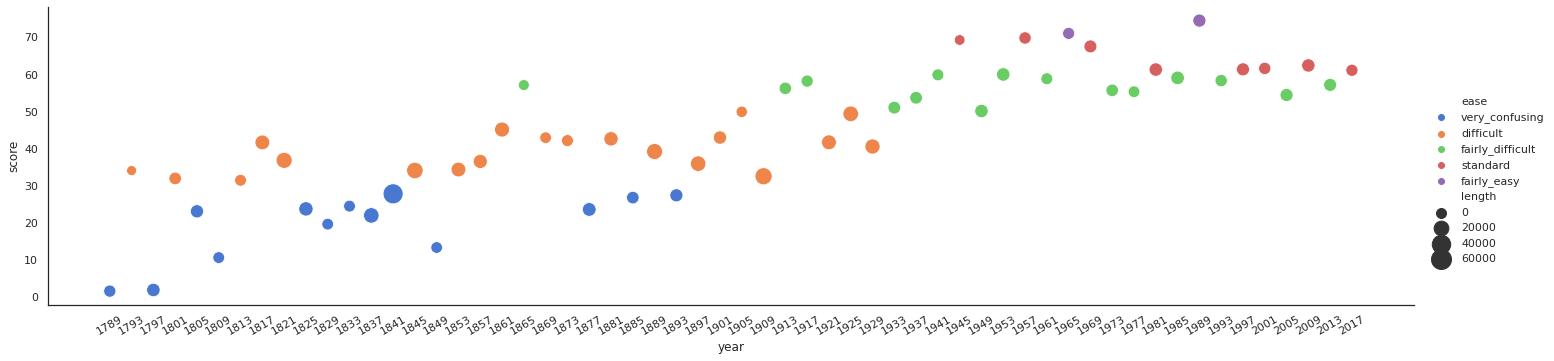

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
chart = sns.relplot(x="year", y="score", size="length", hue='ease',
            sizes=(100, 400), palette="muted", 
            height=5, aspect=4, data=df)
chart.set_xticklabels(rotation=30)
plt.show()